Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics



Loading the file

In [ ]:
calories=pd.read_csv('calories.csv')
exercise=pd.read_csv('exercise.csv')

Viewing the top 5 rows

In [ ]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Merging the two DataFromes

In [ ]:
df=pd.merge(calories,exercise,on="User_ID")

In [ ]:
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


viewing the shape of the dataset

In [ ]:
df.shape

(15000, 9)

checking the columns

In [ ]:
df.columns

Index(['User_ID', 'Calories', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

Getting the information of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


Checking the null values

In [ ]:
df.isnull().sum()

,0
User_ID,0
Calories,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0


In [ ]:
df.duplicated().any()

False

Checking the datatype

In [ ]:
df.dtypes

,0
User_ID,int64
Calories,float64
Gender,object
Age,int64
Height,float64
Weight,float64
Duration,float64
Heart_Rate,float64
Body_Temp,float64


In [ ]:
df['Gender']=df['Gender'].astype('category')

In [ ]:
df.dtypes

,0
User_ID,int64
Calories,float64
Gender,category
Age,int64
Height,float64
Weight,float64
Duration,float64
Heart_Rate,float64
Body_Temp,float64


Getting the information and overall statistics about the dataset

In [ ]:
df.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


Data visualization

Univarient Analysis (Numerical data)

In [ ]:
sns.set()

<ipython-input-17-92807b2433e9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],color='violet')


<Axes: xlabel='Age', ylabel='Density'>

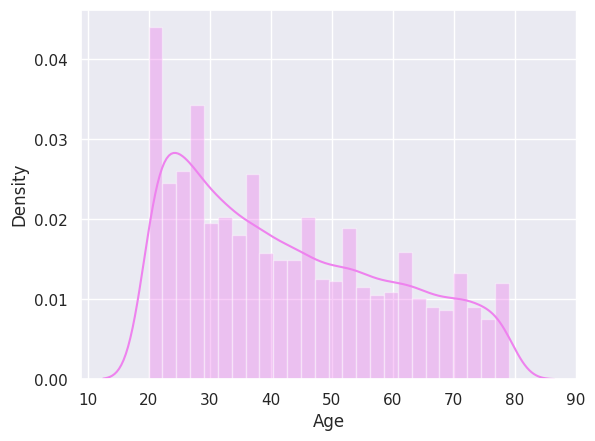

In [ ]:
sns.distplot(df['Age'],color='violet')

<ipython-input-18-dd0603b4646d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'],color='red')


<Axes: xlabel='Height', ylabel='Density'>

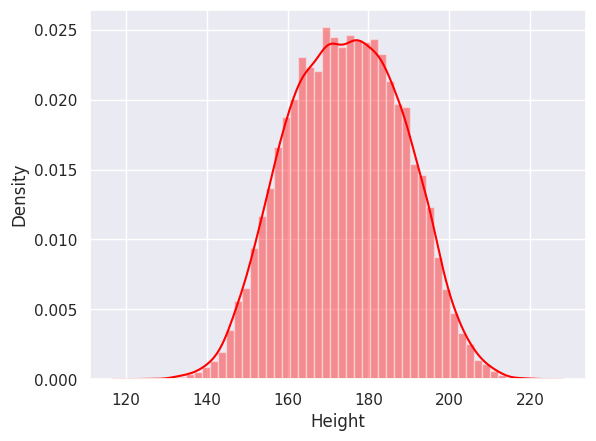

In [ ]:
sns.distplot(df['Height'],color='red')

<Axes: xlabel='Weight', ylabel='Count'>

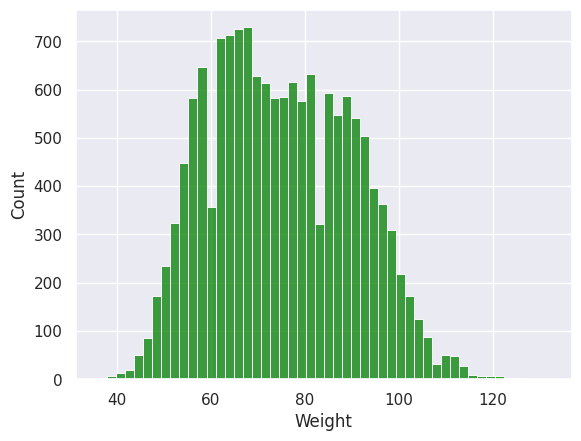

In [ ]:
sns.histplot(df['Weight'],color='green')

<Axes: xlabel='Duration', ylabel='Count'>

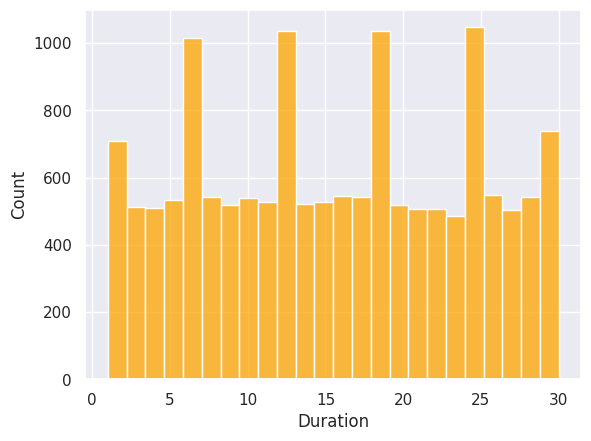

In [ ]:
sns.histplot(df['Duration'],color='orange')

<ipython-input-21-8aafc1373603>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Heart_Rate'],color='red')


<Axes: xlabel='Heart_Rate', ylabel='Density'>

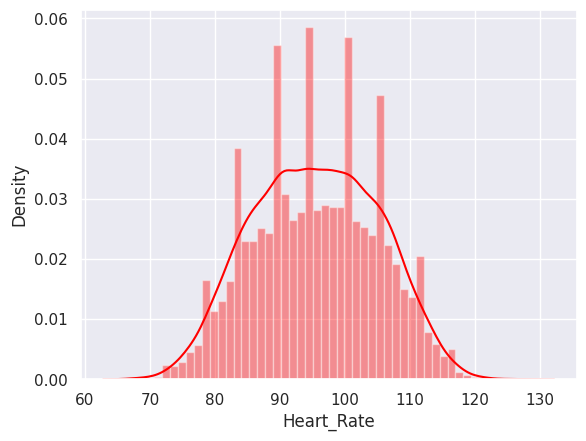

In [ ]:
sns.distplot(df['Heart_Rate'],color='red')

<ipython-input-22-8beb733d76fd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Body_Temp'],color='blue')


<Axes: xlabel='Body_Temp', ylabel='Density'>

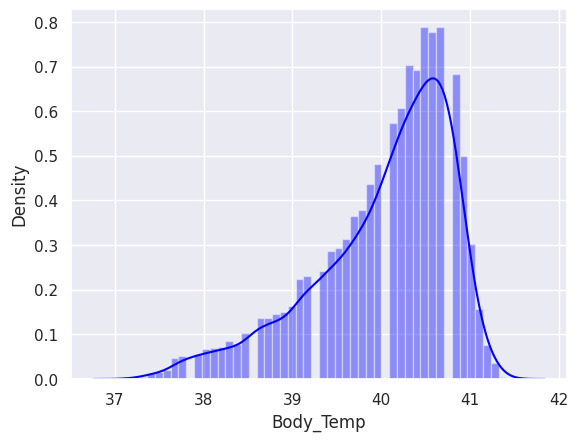

In [ ]:
sns.distplot(df['Body_Temp'],color='blue')

Categorical data

<Axes: xlabel='Gender', ylabel='count'>

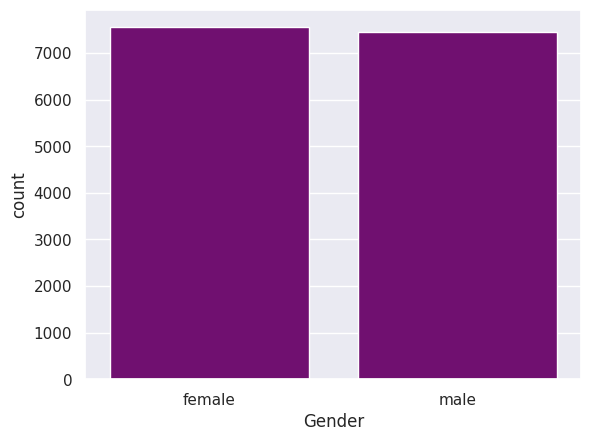

In [ ]:
sns.countplot(x=df['Gender'],color='purple')

Bivarient (Numerical vs Numerical)

<Axes: xlabel='Age', ylabel='Weight'>

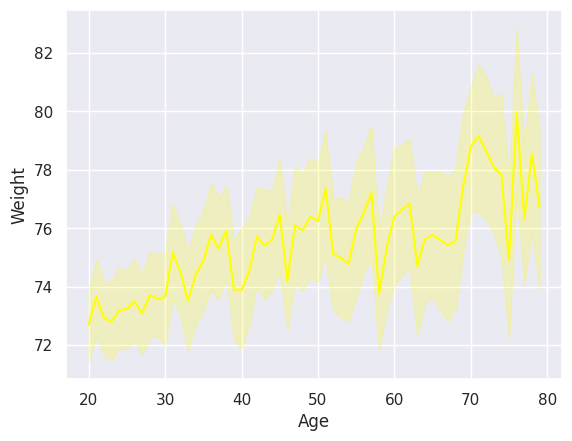

In [ ]:
sns.lineplot(x='Age',y='Weight',data=df,color='yellow')

<Axes: xlabel='Age', ylabel='Height'>

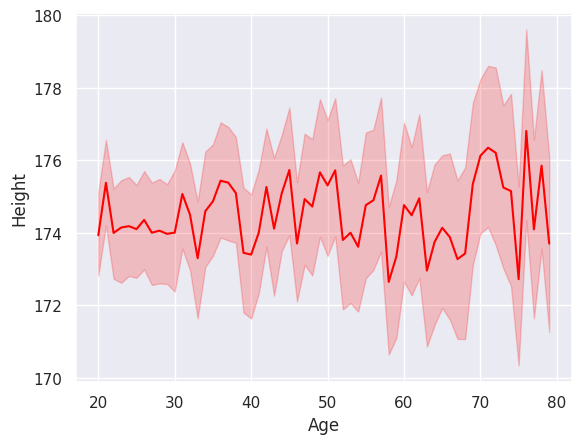

In [ ]:
sns.lineplot(x='Age',y='Height',data=df,color='red')

<Axes: xlabel='Duration', ylabel='Calories'>

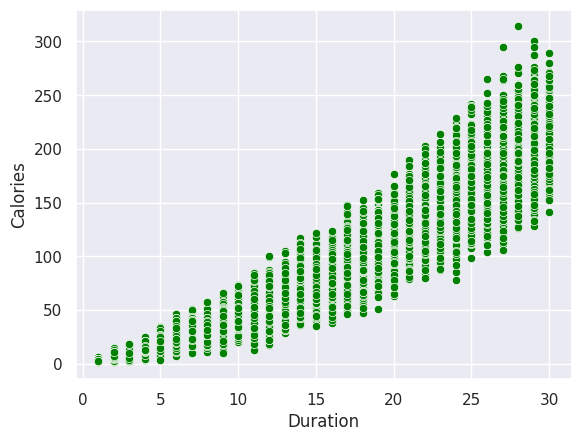

In [ ]:
sns.scatterplot(x='Duration',y='Calories',data=df,color='green')

<Axes: xlabel='Heart_Rate', ylabel='Body_Temp'>

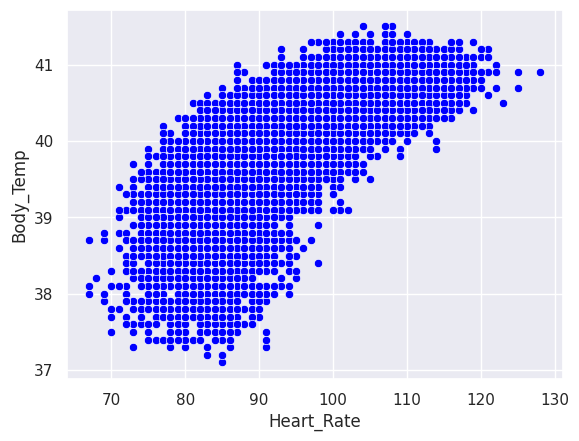

In [ ]:
sns.scatterplot(x='Heart_Rate',y='Body_Temp',data=df,color='blue')

Numerical vs Categorical

<Axes: xlabel='Gender', ylabel='Age'>

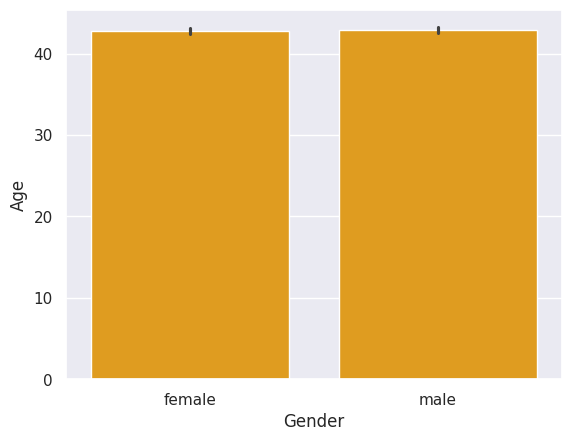

In [ ]:
sns.barplot(x='Gender',y='Age',data=df,color='orange')

<Axes: xlabel='Gender', ylabel='Weight'>

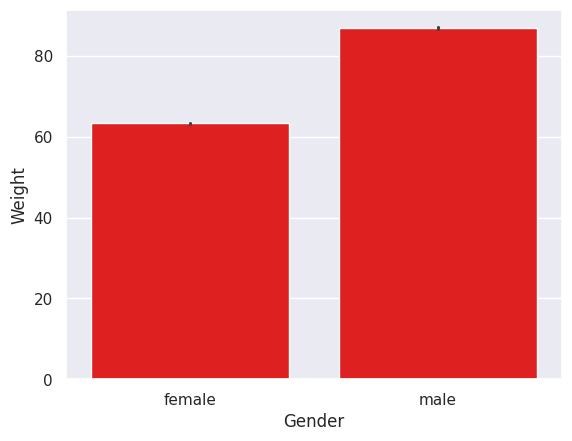

In [ ]:
sns.barplot(x='Gender',y='Weight',data=df,color='red')

<Axes: xlabel='Gender', ylabel='Height'>

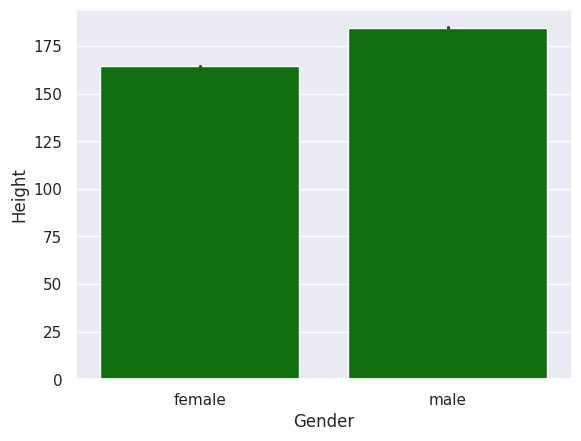

In [ ]:
sns.barplot(x='Gender',y='Height',data=df,color='green')

<Axes: xlabel='Gender', ylabel='Duration'>

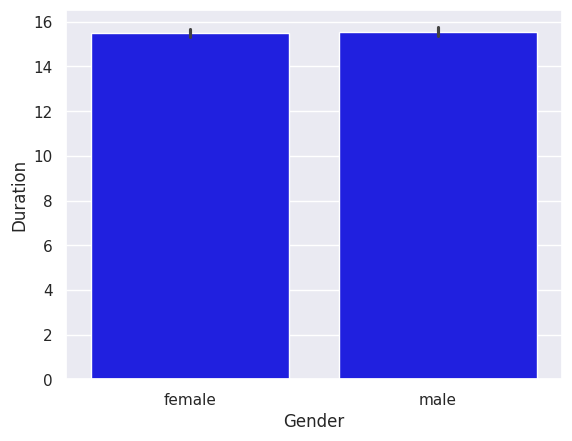

In [ ]:
sns.barplot(x='Gender',y='Duration',data=df,color='blue')

<Axes: xlabel='Gender', ylabel='Heart_Rate'>

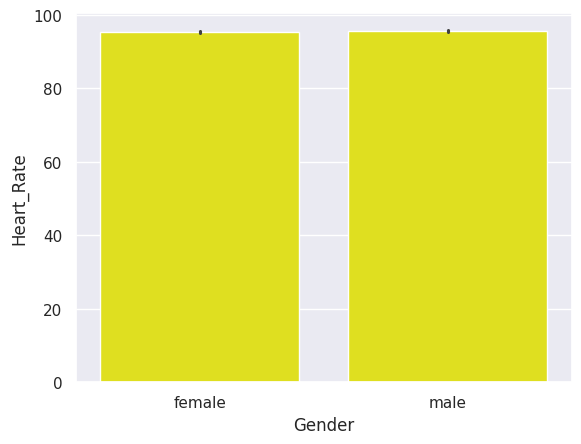

In [ ]:
sns.barplot(x='Gender',y='Heart_Rate',data=df,color='yellow')

<Axes: xlabel='Gender', ylabel='Body_Temp'>

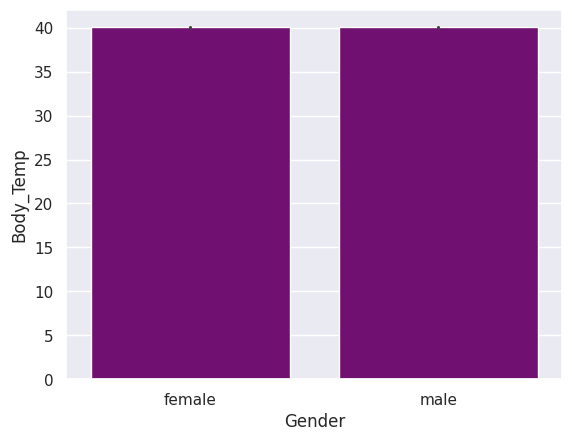

In [ ]:
sns.barplot(x='Gender',y='Body_Temp',data=df,color='purple')

Mapping the gender values to 0 & 1

In [ ]:
df.replace({'Gender':{'male':0,'female':1}},inplace=True)

<ipython-input-34-bbba67831fce>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Gender':{'male':0,'female':1}},inplace=True)
<ipython-input-34-bbba67831fce>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df.replace({'Gender':{'male':0,'female':1}},inplace=True)


Finding the Correlation

1.Posive correlation
2.Negative correlation

In [ ]:
correlation=df.corr()

<Axes: >

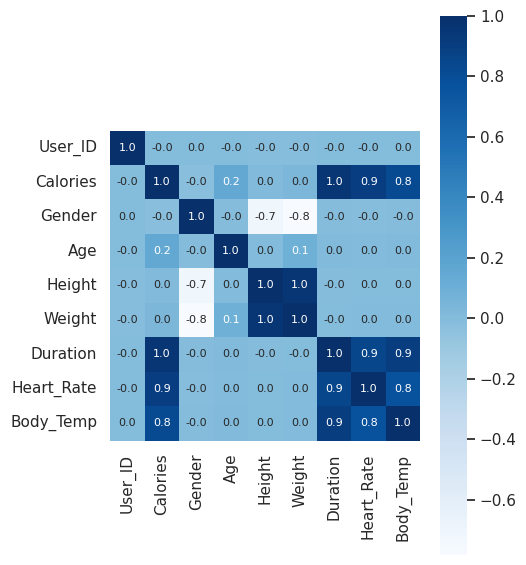

In [ ]:
#constructing a heat map to understand the correlation

plt.figure(figsize=(5,7))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [ ]:
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,0,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,1,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,0,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,1,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,1,27,154.0,58.0,10.0,81.0,39.8


Separating features and target

In [ ]:
X=df.drop(['Calories','User_ID'],axis=1)
y=df['Calories']

In [ ]:
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4
14996,1,27,165.0,65.0,6.0,85.0,39.2
14997,1,43,159.0,58.0,16.0,90.0,40.1
14998,0,78,193.0,97.0,2.0,84.0,38.3


In [ ]:
y

,Calories
0,231.0
1,66.0
2,26.0
3,71.0
4,35.0
...,...
14995,45.0
14996,23.0
14997,75.0
14998,11.0


Splitting the data into trainig data and testing data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


Model Training

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)

rf=RandomForestRegressor()
rf.fit(X_train,y_train)

gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)


GradientBoostingRegressor()

Prediction

In [ ]:
y_pred1=lr.predict(X_test)
y_pred2=rf.predict(X_test)
y_pred3=gbr.predict(X_test)

In [ ]:
print(y_pred1,y_pred2,y_pred3)

[137.49241057 182.18166512  50.15864741 ... 157.56637167  16.54924422
 100.21047087] [128.95 224.9   36.6  ... 146.24  23.92  88.68] [127.1327758  226.19124002  38.36556999 ... 145.16622941  23.32577361
  92.28350552]


In [ ]:
from sklearn import metrics

In [ ]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)


In [ ]:
print(score1,score2,score3)

0.9668790377181355 0.998170208793173 0.9962904019817909


In [ ]:
final_data=pd.DataFrame({'models':['LR','RF','GBR'],'R2_SCORE':[score1,score2,score3]})

In [ ]:
final_data

,models,R2_SCORE
0,LR,0.966879
1,RF,0.998170
2,GBR,0.996290


<Axes: xlabel='models', ylabel='R2_SCORE'>

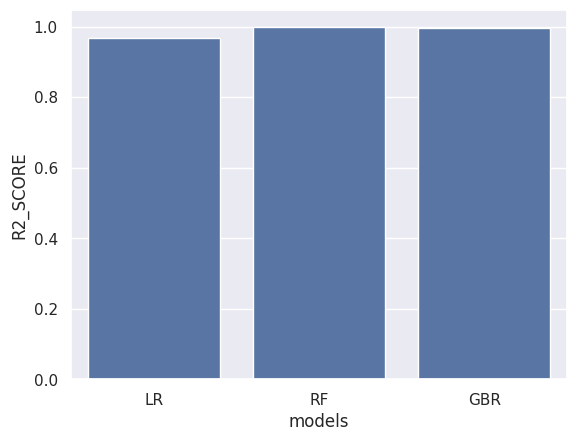

In [ ]:
sns.barplot(x='models', y='R2_SCORE', data=final_data)


save the model

In [ ]:
gbr=GradientBoostingRegressor()
gbr_final=gbr.fit(X,y)

In [ ]:
import joblib

In [ ]:
joblib.dump(gbr_final,'calorie_burn_prediction')

['calorie_burn_prediction']

In [ ]:
model=joblib.load('calorie_burn_prediction')

In [ ]:
data_new=pd.DataFrame({'Gender':0,'Age':32,'Height':154,'Weight':50,'Duration':24,'Heart_Rate':98,'Body_Temp':45},index=[0])

In [ ]:
model.predict(data_new)

array([123.73282551])